In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Optional (If using Colab)

In [2]:
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/COMS4995_Project")
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/Colab Notebooks/COMS4995_Project']

### Optional (Install necessary dependecy in colab)

In [3]:
!pip install category_encoders
!pip install -U scikit-learn

     |████████████████████████████████| 82 kB 347 kB/s 


In [4]:
from dataset.Preprocess import Preprocess, MissingHandler
from dataset.Encoder import DateHourEncoder, DateWeekEncoder, DateMonthEncoder, DateYearEncoder
from utils.read_file import read_from_csv
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Read data

In [5]:
file = "/content/drive/MyDrive/Colab Notebooks/COMS4995_Project/data/transaction.csv"
df = read_from_csv(file)
df

Load DataFrame!


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,1.0,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,1.0,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,1.0,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,1.0,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90.0,1.0,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,NaN,1095.04,NaN,NaN,NaN,False,NaN,NaN,False,False
786359,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,9.0,1.0,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,NaN,1214.96,NaN,NaN,NaN,False,NaN,NaN,False,False
786360,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,2.0,1.0,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,NaN,1233.85,NaN,NaN,NaN,False,NaN,NaN,False,False
786361,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,9.0,99.0,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,NaN,1283.28,NaN,NaN,NaN,False,NaN,NaN,False,False


### Transformation

#### Transform Date variable

In [6]:
he = DateHourEncoder("%Y-%m-%dT%H:%M:%S")
me = DateMonthEncoder("%Y-%m-%dT%H:%M:%S")
we = DateWeekEncoder("%Y-%m-%dT%H:%M:%S")
ye = DateYearEncoder("%Y-%m-%dT%H:%M:%S")

df["transactionDateTime_hour"] = he.transform(df["transactionDateTime"])
df["transactionDateTime_weekday"] = we.transform(df["transactionDateTime"])
df["transactionDateTime_month"] = me.transform(df["transactionDateTime"])
# df["transactionDateTime_year"] = ye.transform(df["transactionDateTime"])

# df["accountOpenDate_year"] = DateYearEncoder("%Y-%m-%d").transform(df["accountOpenDate"])
# df["accountOpenDate_weekday"] = DateWeekEncoder("%Y-%m-%d").transform(df["accountOpenDate"])
# df["accountOpenDate_month"] = DateMonthEncoder("%Y-%m-%d").transform(df["accountOpenDate"])

# df["dateOfLastAddressChange_year"] = DateYearEncoder("%Y-%m-%d").transform(df["dateOfLastAddressChange"])
# df["dateOfLastAddressChange_weekday"] = DateWeekEncoder("%Y-%m-%d").transform(df["dateOfLastAddressChange"])
# df["dateOfLastAddressChange_month"] = DateMonthEncoder("%Y-%m-%d").transform(df["dateOfLastAddressChange"])

# df["currentExpDate_year"] = DateYearEncoder("%m/%Y").transform(df["currentExpDate"])
# df["currentExpDate_month"] = DateMonthEncoder("%m/%Y").transform(df["currentExpDate"])

#### Transform CVV

In [7]:
df['matchingCVV'] = df['cardCVV'] == df['enteredCVV']

In [8]:
df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,transactionDateTime_hour,transactionDateTime_weekday,transactionDateTime_month,matchingCVV
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,1.0,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False,14,5,8,True
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,1.0,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False,5,1,10,True
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,1.0,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False,9,1,11,True
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,1.0,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False,2,5,12,True
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False,21,3,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90.0,1.0,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,NaN,1095.04,NaN,NaN,NaN,False,NaN,NaN,False,False,18,3,12,True
786359,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,9.0,1.0,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,NaN,1214.96,NaN,NaN,NaN,False,NaN,NaN,False,False,16,6,12,True
786360,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,2.0,1.0,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,NaN,1233.85,NaN,NaN,NaN,False,NaN,NaN,False,False,15,1,12,True
786361,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,9.0,99.0,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,NaN,1283.28,NaN,NaN,NaN,False,NaN,NaN,False,False,0,3,12,True


### Remove some unwanted Variables

In [9]:
df = df.drop(["accountNumber", 
              "accountOpenDate", 
              "dateOfLastAddressChange", 
              "currentExpDate", 
              "transactionDateTime"], axis=1)

In [10]:
df

,customerId,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,transactionDateTime_hour,transactionDateTime_weekday,transactionDateTime_month,matchingCVV
0,737265056,5000.0,5000.00,98.55,Uber,US,US,2.0,1.0,rideshare,414,414,1803,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False,14,5,8,True
1,737265056,5000.0,5000.00,74.51,AMC #191138,US,US,9.0,1.0,entertainment,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False,5,1,10,True
2,737265056,5000.0,5000.00,7.47,Play Store,US,US,9.0,1.0,mobileapps,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False,9,1,11,True
3,737265056,5000.0,5000.00,7.47,Play Store,US,US,9.0,1.0,mobileapps,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False,2,5,12,True
4,830329091,5000.0,5000.00,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,885,885,3143,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False,21,3,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,50000.0,48904.96,119.92,Lyft,US,US,90.0,1.0,rideshare,936,936,3783,PURCHASE,NaN,1095.04,NaN,NaN,NaN,False,NaN,NaN,False,False,18,3,12,True
786359,732852505,50000.0,48785.04,18.89,hulu.com,US,US,9.0,1.0,online_subscriptions,939,939,3388,PURCHASE,NaN,1214.96,NaN,NaN,NaN,False,NaN,NaN,False,False,16,6,12,True
786360,732852505,50000.0,48766.15,49.43,Lyft,US,US,2.0,1.0,rideshare,936,936,3783,PURCHASE,NaN,1233.85,NaN,NaN,NaN,False,NaN,NaN,False,False,15,1,12,True
786361,732852505,50000.0,48716.72,49.89,walmart.com,US,US,9.0,99.0,online_retail,939,939,3388,PURCHASE,NaN,1283.28,NaN,NaN,NaN,False,NaN,NaN,False,False,0,3,12,True


### Change some data type
We notice that some data type is int64 or float but actually a categorical data, so we need to change those data into categorical data

In [11]:
# objects = ["customerId",
#            "transactionDateTime_hour", 
#            "transactionDateTime_weekday", 
#            "transactionDateTime_weekday", 
#            "transactionDateTime_month", 
#            "transactionDateTime_year", 
#            "accountOpenDate_year", 
#            "accountOpenDate_weekday", 
#            "accountOpenDate_month", 
#            "dateOfLastAddressChange_year", 
#            "dateOfLastAddressChange_weekday", 
#            "dateOfLastAddressChange_month", 
#            "currentExpDate_year", 
#            "currentExpDate_month"]
#df = df.drop('merchantCategoryCode', axis=1)
objects = ["customerId", 
           "posEntryMode",
           "posConditionCode",
           "cardCVV", 
           "enteredCVV", 
           "cardLast4Digits",
           "transactionDateTime_hour", 
           "transactionDateTime_weekday", 
           "transactionDateTime_weekday", 
           "transactionDateTime_month"]
# objects = ["transactionDateTime_hour", 
#            "transactionDateTime_weekday", 
#            "transactionDateTime_weekday", 
#            "transactionDateTime_month", 
#            "transactionDateTime_year"]
df[objects] = df[objects].astype(object)

### Randomly sample from the Dataset (optional)
Dataset are extremely huge in this cases, so, we can choose to sample part of the data from the dataset

In [12]:
df = df.sample(n=200000, random_state=23)

### Preprocess the data
Including Handle the missing data, Scale the numerical data, Encode the categorical data into Onehot encoding and ordinal encoding

In [13]:
# Missing Handler
handler = MissingHandler(df, impute=False, target="isFraud")
X, y = handler.get_features(), handler.get_labels()


# Train validation Test split
dev_x, test_x, dev_y, test_y = train_test_split(X, y, test_size=0.2, random_state=23, stratify=y)
train_x, val_x, train_y, val_y = train_test_split(dev_x, dev_y, test_size=0.25, random_state=23, stratify=dev_y)

o_features = ['customerId', 
              'acqCountry', 
              'merchantCountryCode', 
              'posEntryMode', 
              'posConditionCode', 
              'merchantCategoryCode', 
              'transactionType', 
              'cardPresent', 
              'expirationDateKeyInMatch', 
              'transactionDateTime_hour', 
              'transactionDateTime_weekday', 
              'transactionDateTime_month', 
              'matchingCVV']

t_features = ['customerId', 'merchantName', 'cardCVV', 'enteredCVV', 'cardLast4Digits']

# default encoding is to encode all categorical data with ONEHOT encoding
# You can choose whether to implement oridinal encoding or Target encoding by specifying corresponding features' name
# e.g. p = Preprocess(X, y, handler, oridinal_features=o_features)
p = Preprocess(X, y, handler, target_features=t_features)
p.__fit__()


train_x, train_y = p.preprocessor.transform(train_x), p.tar_handler.transform(train_y)
val_x, val_y = p.preprocessor.transform(val_x), p.tar_handler.transform(val_y)
test_x, test_y = p.preprocessor.transform(test_x), p.tar_handler.transform(test_y)

num_f: ['transactionAmount', 'availableMoney', 'creditLimit', 'currentBalance'], cate_f: ['merchantCategoryCode', 'acqCountry', 'transactionDateTime_month', 'matchingCVV', 'transactionDateTime_weekday', 'posEntryMode', 'transactionType', 'expirationDateKeyInMatch', 'cardPresent', 'posConditionCode', 'transactionDateTime_hour', 'merchantCountryCode'], ordinal_features: None, target_features: ['customerId', 'merchantName', 'cardCVV', 'enteredCVV', 'cardLast4Digits']


In [14]:
train_x.shape

(118479, 96)

### Dealing with Imbalanced (optional)
In this scenario, the data are highly imbalanced, so we may want to use some sampling mechanisms (including under sampling, over sampling) to handle the imbalanced data

In [15]:
from dataset.Sampling import Sampling, SampleMechanism

# You can apply different sampling strategies by changing the mechanism
# So far supporting under sampling -  SampleMechanism.under (default)
# Over sampling - SampleMechanism.over
# SMOTE sampling - SampleMechanism.SMOTE
Sampler1 = Sampling(train_x, train_y, mechanism=SampleMechanism.under)
train_x_resample, train_y_resample = Sampler1.get_features(), Sampler1.get_labels()
Sampler2 = Sampling(val_x, val_y)
val_x_resample, val_y_resample = Sampler2.get_features(), Sampler2.get_labels()
Sampler3 = Sampling(test_x, test_y)
test_x_resample, test_y_resample = Sampler3.get_features(), Sampler3.get_labels()

In [16]:
print(f"resample train size: {train_x_resample.shape}, \nresample validation size: {val_x_resample.shape}, \nresample test size: {test_x_resample.shape}")

resample train size: (3594, 96), 
resample validation size: (1198, 96), 
resample test size: (1198, 96)


In [17]:
import numpy as np
from collections import Counter

In [18]:
print(f"resample train size, positive vs negative: {Counter(train_y_resample)}\nresample validation size, positive vs negative: {Counter(val_y_resample)}\nresample test size: {Counter(val_y_resample)}")

resample train size, positive vs negative: Counter({0: 1797, 1: 1797})
resample validation size, positive vs negative: Counter({0: 599, 1: 599})
resample test size: Counter({0: 599, 1: 599})


### Model

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

### Confusion Matrix

In [20]:
import seaborn as sns
def plot_confusion(y_pred, y_true):
    conf = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    print()
    print(f'Accuracy: {acc}')
    sns.heatmap(conf,
                cmap='Blues',
                cbar=False,
                annot=True,
                fmt='g',
                xticklabels=['False', 'True'],
                yticklabels=['False', 'True'],
                annot_kws={"size": 20}
                )
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [21]:
# Hyper-paramater Tuning
parameters = {'max_depth':[2, 3, 5, 10, 20, 50], 
              'n_estimators':[10,50, 100,200], 
             'min_samples_leaf':[1,2,3]}
rf_clf = GridSearchCV(RandomForestClassifier(n_jobs=-1), parameters, cv=5)
rf_clf.fit(train_x, train_y)

KeyboardInterrupt: ignored

In [ ]:
rf_clf.best_params_

{'max_depth': 50, 'min_samples_leaf': 2, 'n_estimators': 50}

In [21]:
# Training
%%time
rf_clf = RandomForestClassifier(max_depth=50, min_samples_leaf=2, n_estimators=50).fit(train_x, train_y)

CPU times: user 35.5 s, sys: 47.4 ms, total: 35.5 s
Wall time: 35.3 s


### Evaluation

In [22]:
# Positive Level
print('RandomForest test acc is : ', accuracy_score(test_y, rf_clf.predict(test_x)))
print('RandomForest test precision is : ', precision_score(test_y, rf_clf.predict(test_x), pos_label=1))
print('RandomForest test recall is : ', recall_score(test_y, rf_clf.predict(test_x), pos_label=1))
print('RandomForest test f1 is : ', f1_score(test_y, rf_clf.predict(test_x), pos_label=1))
print('RandomForest test auc is : ', roc_auc_score(test_y, np.max(rf_clf.predict_proba(test_x),1)))

RandomForest test acc is :  0.9855670625174081
RandomForest test precision is :  1.0
RandomForest test recall is :  0.048414023372287146
RandomForest test f1 is :  0.09235668789808917
RandomForest test auc is :  0.1253532030424201


In [23]:
# Macro
print('RandomForest test acc is : ', accuracy_score(test_y, rf_clf.predict(test_x)))
print('RandomForest test precision is : ', precision_score(test_y, rf_clf.predict(test_x), pos_label=1, average ='macro'))
print('RandomForest test recall is : ', recall_score(test_y, rf_clf.predict(test_x), pos_label=1, average ='macro'))
print('RandomForest test f1 is : ', f1_score(test_y, rf_clf.predict(test_x), pos_label=1, average ='macro'))
print('RandomForest test auc is : ', roc_auc_score(test_y, np.max(rf_clf.predict_proba(test_x),1)))

RandomForest test acc is :  0.9855670625174081
RandomForest test precision is :  0.9927782282586661
RandomForest test recall is :  0.5242070116861436
RandomForest test f1 is :  0.5425411913928283
RandomForest test auc is :  0.1253532030424201


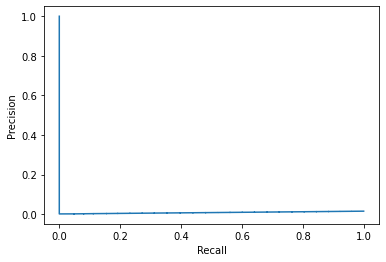

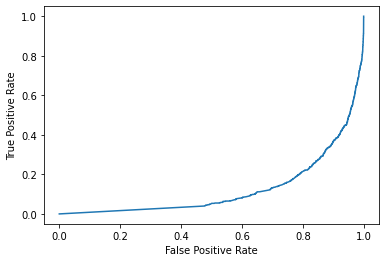

In [24]:
# Precesion-Recall curve & ROC curve 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = np.max(rf_clf.predict_proba(test_x),1)

rf_prec, rf_recall, _ = precision_recall_curve(test_y, y_score)
pr_display = PrecisionRecallDisplay(precision=rf_prec, recall=rf_recall).plot()

rf_fpr, rf_tpr, _ = roc_curve(test_y, y_score, pos_label=rf_clf.classes_[1])
roc_display = RocCurveDisplay(fpr=rf_fpr, tpr=rf_tpr).plot()

In [26]:
# Training Embdding
import pickle

path = "/content/drive/MyDrive/Colab Notebooks/COMS4995_Project/sample2_undersampling"

pik_file1 = open(f"{path}/train_v.pkl", 'rb')
pik_file2 = open(f"{path}/test_v.pkl", 'rb')
pik_file3 = open(f"{path}/train_v_resample.pkl", 'rb')
pik_file4 = open(f"{path}/test_v_resample.pkl", 'rb')
train_v = pickle.load(pik_file1)
test_v = pickle.load(pik_file2)
train_v_resample = pickle.load(pik_file3)
test_v_resample = pickle.load(pik_file4)



In [43]:
### train_v
%%time
rf_clf = RandomForestClassifier(max_depth=50, min_samples_leaf=2, n_estimators=50).fit(train_v[0], train_v[1])

CPU times: user 2min 30s, sys: 197 ms, total: 2min 30s
Wall time: 2min 29s


In [44]:
# Macro
print('RandomForest test acc is : ', accuracy_score(test_v[1], rf_clf.predict(test_v[0])))
print('RandomForest test precision is : ', precision_score(test_v[1], rf_clf.predict(test_v[0]), pos_label=1, average ='macro'))
print('RandomForest test recall is : ', recall_score(test_v[1], rf_clf.predict(test_v[0]), pos_label=1, average ='macro'))
print('RandomForest test f1 is : ', f1_score(test_v[1], rf_clf.predict(test_v[0]), pos_label=1, average ='macro'))
print('RandomForest test auc is : ', roc_auc_score(test_v[1], np.max(rf_clf.predict_proba(test_v[0]),1)))

RandomForest test acc is :  0.9861781709091377
RandomForest test precision is :  0.9743124820718962
RandomForest test recall is :  0.5534566515743518
RandomForest test f1 is :  0.592791508020325
RandomForest test auc is :  0.18291945420597927


In [45]:
# Positive Label
print('RandomForest test acc is : ', accuracy_score(test_v[1], rf_clf.predict(test_v[0])))
print('RandomForest test precision is : ', precision_score(test_v[1], rf_clf.predict(test_v[0]), pos_label=1))
print('RandomForest test recall is : ', recall_score(test_v[1], rf_clf.predict(test_v[0]), pos_label=1))
print('RandomForest test f1 is : ', f1_score(test_v[1], rf_clf.predict(test_v[0]), pos_label=1))
print('RandomForest test auc is : ', roc_auc_score(test_v[1], np.max(rf_clf.predict_proba(test_v[0]),1)))

RandomForest test acc is :  0.9861781709091377
RandomForest test precision is :  0.9624060150375939
RandomForest test recall is :  0.10697868783953197
RandomForest test f1 is :  0.19255359157578036
RandomForest test auc is :  0.18291945420597927


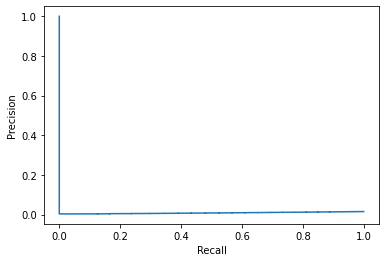

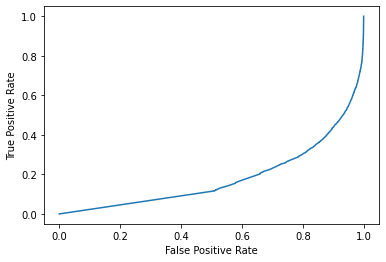

In [46]:
# Precesion-Recall curve & ROC curve 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = np.max(rf_clf.predict_proba(test_v[0]),1)

rf_prec, rf_recall, _ = precision_recall_curve(test_v[1], y_score)
pr_display = PrecisionRecallDisplay(precision=rf_prec, recall=rf_recall).plot()

rf_fpr, rf_tpr, _ = roc_curve(test_v[1], y_score, pos_label=rf_clf.classes_[1])
roc_display = RocCurveDisplay(fpr=rf_fpr, tpr=rf_tpr).plot()

In [47]:
### train_v_resample
%%time
rf_clf = RandomForestClassifier(max_depth=50, min_samples_leaf=2, n_estimators=50).fit(train_v_resample[0], train_v_resample[1])

CPU times: user 2.32 s, sys: 2.95 ms, total: 2.32 s
Wall time: 2.33 s


In [48]:
# Macro
print('RandomForest test acc is : ', accuracy_score(test_v_resample[1], rf_clf.predict(test_v_resample[0])))
print('RandomForest test precision is : ', precision_score(test_v_resample[1], rf_clf.predict(test_v_resample[0]), pos_label=1, average ='macro'))
print('RandomForest test recall is : ', recall_score(test_v_resample[1], rf_clf.predict(test_v_resample[0]), pos_label=1, average ='macro'))
print('RandomForest test f1 is : ', f1_score(test_v_resample[1], rf_clf.predict(test_v_resample[0]), pos_label=1, average ='macro'))
print('RandomForest test auc is : ', roc_auc_score(test_v_resample[1], np.max(rf_clf.predict_proba(test_v_resample[0]),1)))

RandomForest test acc is :  0.7511491851232762
RandomForest test precision is :  0.7515797719222873
RandomForest test recall is :  0.7511491851232762
RandomForest test f1 is :  0.7510426605177019
RandomForest test auc is :  0.529891997641121


In [49]:
# Positive label
print('RandomForest test acc is : ', accuracy_score(test_v_resample[1], rf_clf.predict(test_v_resample[0])))
print('RandomForest test precision is : ', precision_score(test_v_resample[1], rf_clf.predict(test_v_resample[0]), pos_label=1))
print('RandomForest test recall is : ', recall_score(test_v_resample[1], rf_clf.predict(test_v_resample[0]), pos_label=1))
print('RandomForest test f1 is : ', f1_score(test_v_resample[1], rf_clf.predict(test_v_resample[0]), pos_label=1))
print('RandomForest test auc is : ', roc_auc_score(test_v_resample[1], np.max(rf_clf.predict_proba(test_v_resample[0]),1)))

RandomForest test acc is :  0.7511491851232762
RandomForest test precision is :  0.7411717495987159
RandomForest test recall is :  0.7718345173422482
RandomForest test f1 is :  0.7561924257932445
RandomForest test auc is :  0.529891997641121


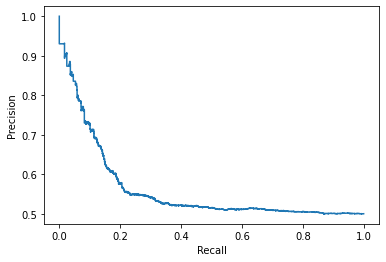

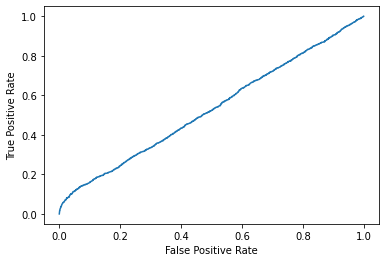

In [50]:
# Precesion-Recall curve & ROC curve 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = np.max(rf_clf.predict_proba(test_v_resample[0]),1)

rf_prec, rf_recall, _ = precision_recall_curve(test_v_resample[1], y_score)
pr_display = PrecisionRecallDisplay(precision=rf_prec, recall=rf_recall).plot()

rf_fpr, rf_tpr, _ = roc_curve(test_v_resample[1], y_score, pos_label=rf_clf.classes_[1])
roc_display = RocCurveDisplay(fpr=rf_fpr, tpr=rf_tpr).plot()